In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
# Load the dataset
df = pd.read_csv('Adidas US Sales Datasets.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [117]:
print(df.dtypes)

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object


In [118]:

def prepare_data(df):
    # Convert date column
    df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

    # Remove "$" sign and commas, then convert to float
    for col in ['Price per Unit', 'Total Sales', 'Operating Profit']:
        df[col] = df[col].astype(str).replace(r'\$', '', regex=True).str.replace(',', '').astype(float)

    
    # Extract time-based features
    df['Month'] = df['Invoice Date'].dt.month
    df['Quarter'] = df['Invoice Date'].dt.quarter
    df['Year'] = df['Invoice Date'].dt.year

    return df

cleaned_df = prepare_data(df)
cleaned_df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Quarter,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,50%,In-store,1,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,30%,In-store,1,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,35%,In-store,1,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,35%,In-store,1,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,30%,In-store,1,1,2020


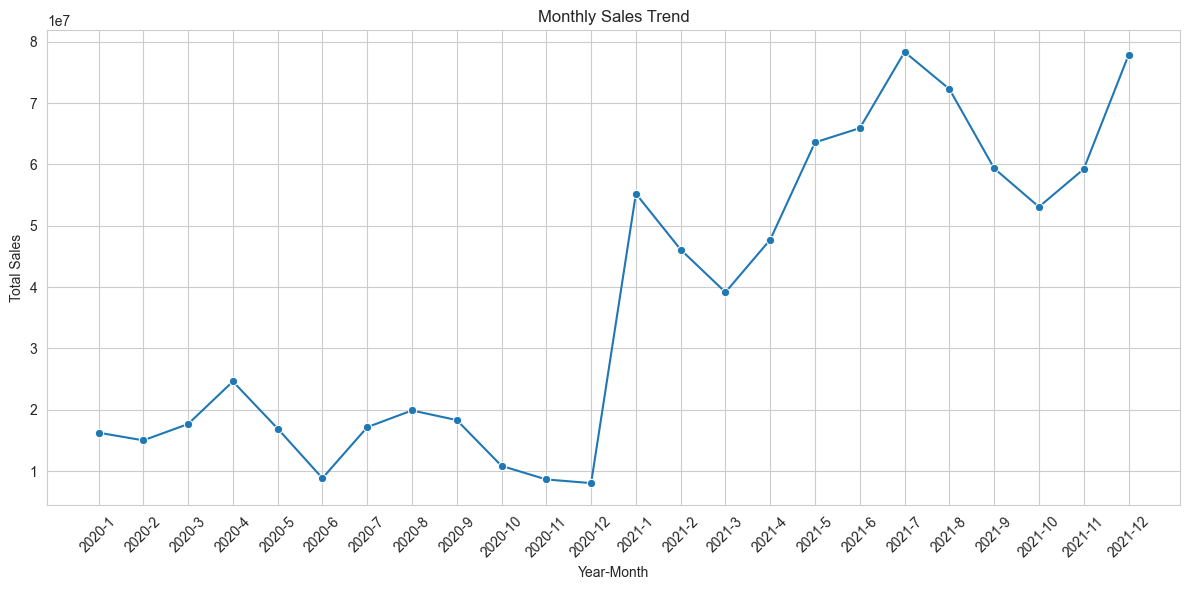

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\2316251524.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


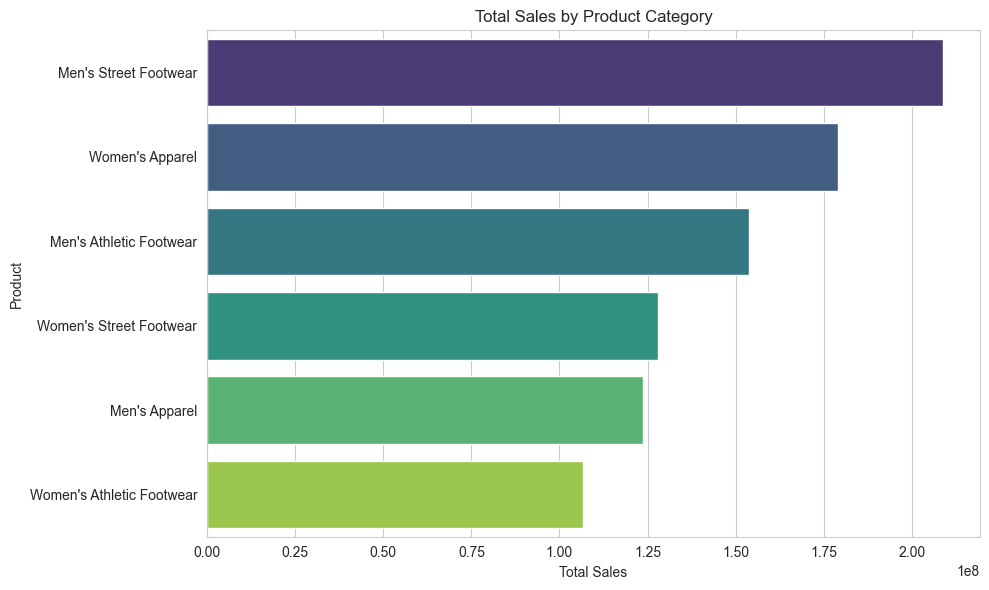

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\2316251524.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')


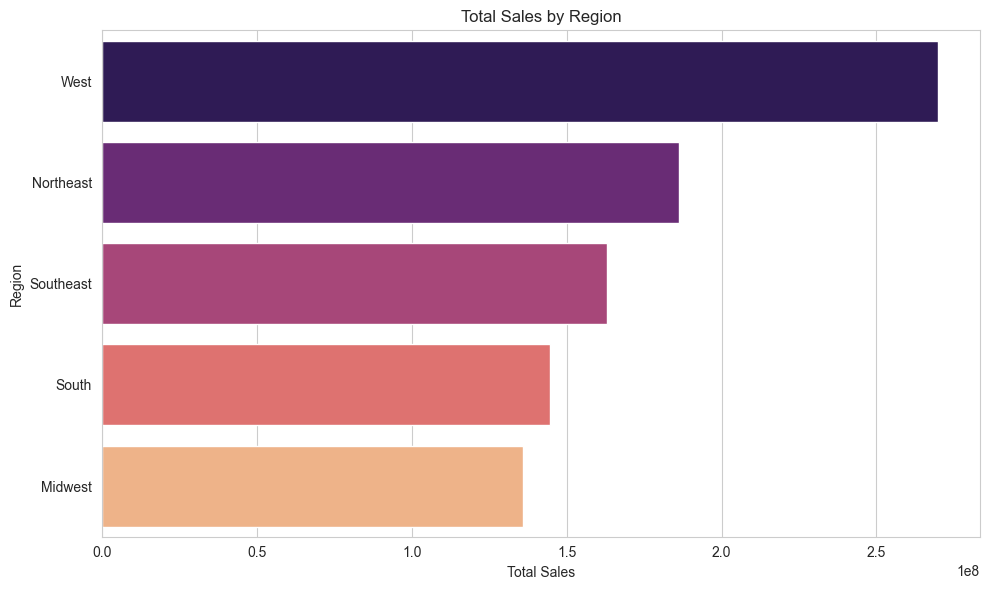

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\2316251524.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retailer_sales.values, y=retailer_sales.index, palette='plasma')


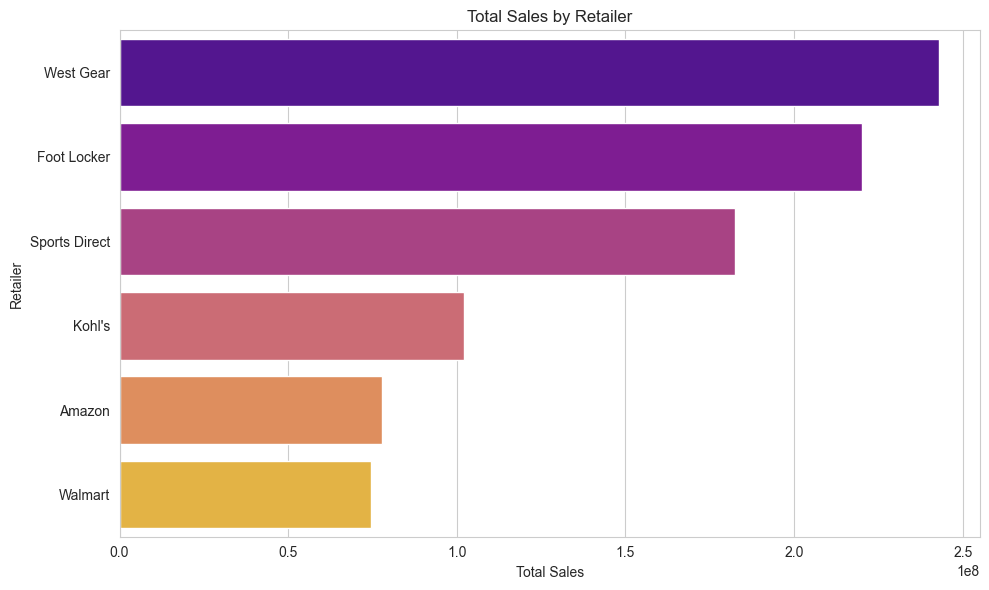

In [119]:

def analyze_trends(df):
    # Set style
    sns.set_style('whitegrid')
    
    # 1. Overall sales trend over time
    plt.figure(figsize=(12, 6))
    monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
    monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)
    sns.lineplot(x='Year-Month', y='Total Sales', data=monthly_sales, marker='o')
    plt.title('Monthly Sales Trend')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Sales by product category
    plt.figure(figsize=(10, 6))
    product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
    plt.title('Total Sales by Product Category')
    plt.xlabel('Total Sales')
    plt.tight_layout()
    plt.show()
    
    # 3. Sales by region
    plt.figure(figsize=(10, 6))
    region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')
    plt.title('Total Sales by Region')
    plt.xlabel('Total Sales')
    plt.tight_layout()
    plt.show()
    
    # 4. Sales by retailer
    plt.figure(figsize=(10, 6))
    retailer_sales = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=retailer_sales.values, y=retailer_sales.index, palette='plasma')
    plt.title('Total Sales by Retailer')
    plt.xlabel('Total Sales')
    plt.tight_layout()
    plt.show()
    
    return {
        'monthly_sales': monthly_sales,
        'product_sales': product_sales,
        'region_sales': region_sales,
        'retailer_sales': retailer_sales
    }

trend_results = analyze_trends(cleaned_df)

In [120]:
# Assuming df is your DataFrame
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']

# Convert to numeric 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check updated data types
print(df.dtypes)


Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                 float64
Total Sales                float64
Operating Profit           float64
Operating Margin            object
Sales Method                object
Month                        int32
Quarter                      int32
Year                         int32
dtype: object


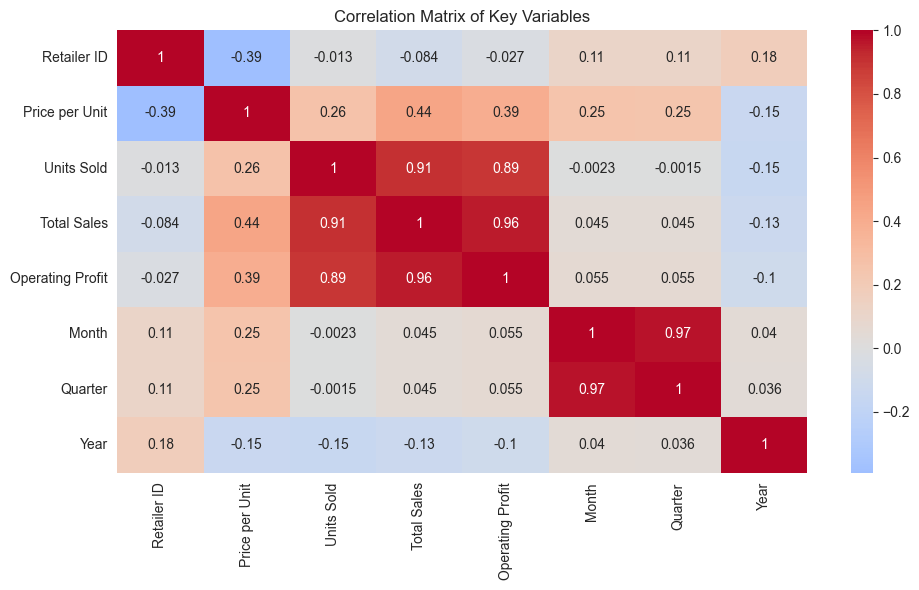

In [121]:

def sales_correlation_analysis(df):
    # Select numerical columns
    numerical_df = df.select_dtypes(include=[np.number])
    
    # Compute correlation matrix
    corr_matrix = numerical_df.corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.show()


# Run analysis
correlation_results = sales_correlation_analysis(cleaned_df)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\582572095.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Issue', data=survey_df.sort_values('Count', ascending=False),


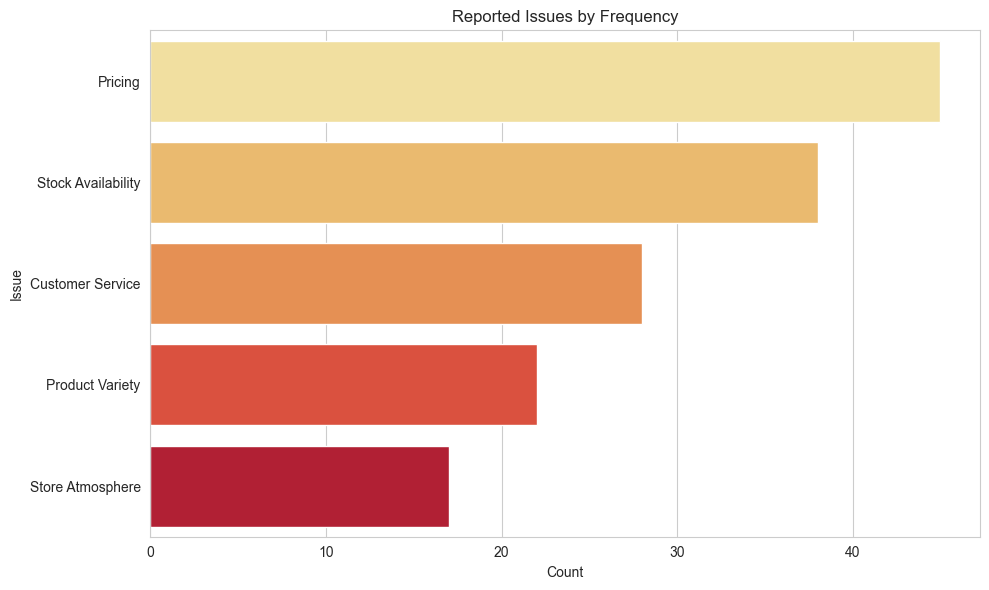

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\582572095.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Severity', y='Issue', data=survey_df.sort_values('Severity', ascending=False),


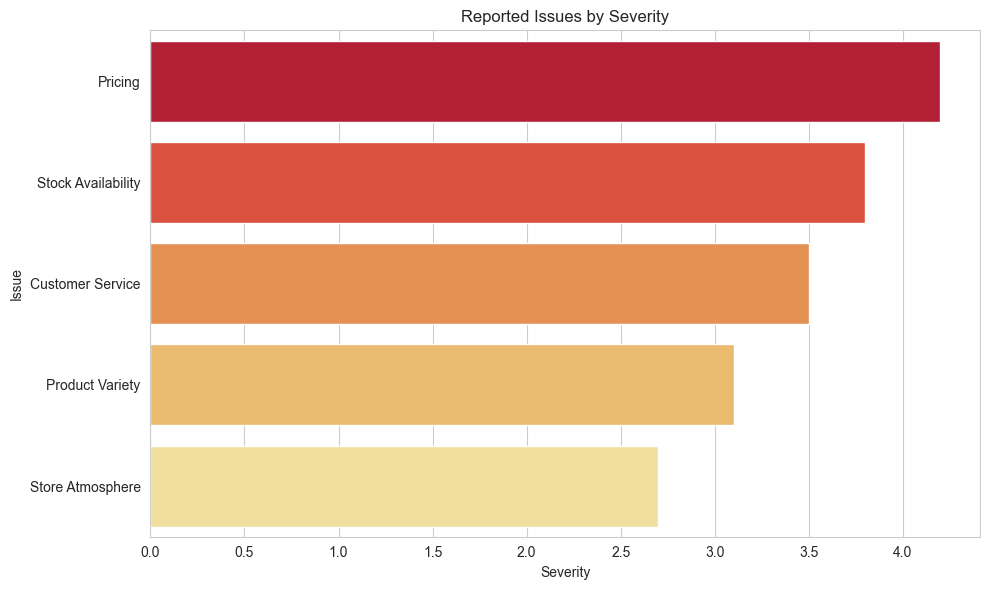

In [122]:
#  root cause analysis 

def simulate_root_cause_analysis():
    survey_data = {
        'Issue': ['Pricing', 'Stock Availability', 'Customer Service', 'Product Variety', 'Store Atmosphere'],
        'Count': [45, 38, 28, 22, 17],
        'Severity': [4.2, 3.8, 3.5, 3.1, 2.7] 
    }
    survey_df = pd.DataFrame(survey_data)
    
    # Visualize survey results
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Issue', data=survey_df.sort_values('Count', ascending=False), 
                palette='YlOrRd')
    plt.title('Reported Issues by Frequency')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Severity', y='Issue', data=survey_df.sort_values('Severity', ascending=False), 
                palette='YlOrRd_r')
    plt.title('Reported Issues by Severity')
    plt.tight_layout()
    plt.show()
    
    return survey_df

root_cause_results = simulate_root_cause_analysis()

Data Types:
 Retailer                     object
Retailer ID                   int64
Invoice Date         datetime64[ns]
Region                       object
State                        object
City                         object
Product                      object
Price per Unit              float64
Units Sold                  float64
Total Sales                 float64
Operating Profit            float64
Operating Margin             object
Sales Method                 object
Month                         int32
Quarter                       int32
Year                          int32
Monetary                    float64
Monetary_Segment           category
Frequency                   float64
Frequency_Segment          category
dtype: object

Sample Data:
    Frequency  Monetary
3      850.0  382500.0
4      900.0  540000.0
7      900.0  450000.0
8      950.0  380000.0
9      825.0  371250.0

Customer Segment Analysis:
                                   Total Sales                          

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11672\3158504457.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = segments.groupby(['Monetary_Segment', 'Frequency_Segment']).agg({


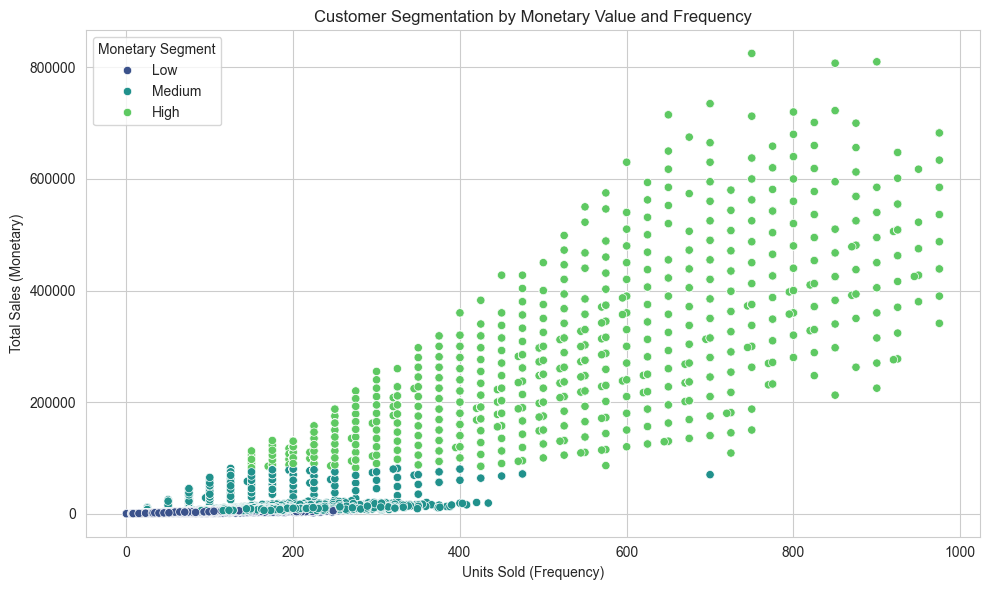


Product Performance by Segment:
Monetary_Segment                 Low                  Medium            \
Frequency_Segment                Low Medium High         Low    Medium   
Product                                                                  
Men's Apparel              1818108.0    0.0  0.0  11221774.0       0.0   
Men's Athletic Footwear    1754035.0    0.0  0.0   8714528.0  355117.0   
Men's Street Footwear      1206135.0    0.0  0.0   6037965.0  309394.0   
Women's Apparel            1635380.0    0.0  0.0   7202687.0  219543.0   
Women's Athletic Footwear  1795452.0    0.0  0.0  12786444.0  385000.0   
Women's Street Footwear    1806751.0    0.0  0.0  11147814.0  967498.0   

Monetary_Segment                          High                          
Frequency_Segment             High         Low      Medium        High  
Product                                                                 
Men's Apparel                  0.0  31223750.0  59801250.0  19663750.0  
Men's At

In [123]:


def segmentation_analysis(df):
    """
    Perform RFM (Recency, Frequency, Monetary) analysis and segmentation.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing sales data.
        
    Returns:
        dict: A dictionary containing segmented data, segment analysis, and product performance.
    """
    # Create a copy of the dataset to avoid modifying the original data
    segments = df.copy()
    
    # Ensure necessary columns are numeric
    segments['Total Sales'] = pd.to_numeric(segments['Total Sales'], errors='coerce')
    segments['Units Sold'] = pd.to_numeric(segments['Units Sold'], errors='coerce')
    segments['Operating Profit'] = pd.to_numeric(segments['Operating Profit'], errors='coerce')
    segments['Price per Unit'] = pd.to_numeric(segments['Price per Unit'], errors='coerce')
    
    # Remove NaN values if any exist
    segments.dropna(subset=['Total Sales', 'Units Sold'], inplace=True)
    
    # Create Monetary Segment
    segments['Monetary'] = segments['Total Sales']
    segments['Monetary_Segment'] = pd.qcut(segments['Monetary'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Create Frequency Segment
    segments['Frequency'] = segments['Units Sold']
    segments['Frequency_Segment'] = pd.cut(segments['Frequency'], bins=3, labels=['Low', 'Medium', 'High'])
    
    # Debugging output to ensure correct types
    print("Data Types:\n", segments.dtypes)
    print("\nSample Data:\n", segments[['Frequency', 'Monetary']].head())
    
    # Perform segment analysis
    segment_analysis = segments.groupby(['Monetary_Segment', 'Frequency_Segment']).agg({
        'Total Sales': ['count', 'sum', 'mean'],
        'Operating Profit': 'mean',
        'Price per Unit': 'mean'
    }).round(2)
    
    print("\nCustomer Segment Analysis:")
    print(segment_analysis)
    
    # Visualization: Scatter plot of segments
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Frequency', y='Monetary', hue='Monetary_Segment', data=segments, palette='viridis')
    plt.title('Customer Segmentation by Monetary Value and Frequency')
    plt.xlabel('Units Sold (Frequency)')
    plt.ylabel('Total Sales (Monetary)')
    plt.legend(title='Monetary Segment')
    plt.tight_layout()
    plt.show()
    
    # Product performance analysis by segment
    product_segment = pd.crosstab(
        index=segments['Product'],
        columns=[segments['Monetary_Segment'], segments['Frequency_Segment']],
        values=segments['Total Sales'],
        aggfunc='sum'
    )
    
    print("\nProduct Performance by Segment:")
    print(product_segment)
    
    return {
        'segmented_data': segments,
        'segment_analysis': segment_analysis,
        'product_segment': product_segment
    }

# results
segmentation_results = segmentation_analysis(cleaned_df)
